# Nội dung chính:

1. Lý thuyết mạng CNN <br/>
    1.1 Convolution layer 
        1.1.1 Fillter 
        1.1.2 Padding 
        1.1.3 Stride (bước sải) 
        1.1.4 Thực hành lớp convolution layer 
    1.2 Pooling <br/>
    1.3 Flatten <br/>
2. Áp dụng CNN cho bài toán MNIST với Keras <br/>
3. Ứng dụng của CNN trong NLP

Nguồn tham khảo:
1. https://tiendv.wordpress.com/2016/12/25/convolutional-neural-networks/
2. https://www.kaggle.com/phamdinhkhanh/convolutional-neural-network
3. https://machinelearningcoban.com/2018/10/03/conv2d
4. http://cs231n.github.io/convolutional-networks/
5. https://nttuan8.com/bai-6-convolutional-neural-network/
6. https://nguyenvanhieu.vn/thuat-toan-cnn-trong-nlp/

`Convolutional Neural Network (CNNs – Mạng nơ-ron tích chập)` là một trong những mô hình Deep Learning tiên tiến. Nó giúp cho chúng ta xây dựng được những hệ thống thông minh với độ chính xác cao như hiện nay. Như hệ thống xử lý ảnh lớn như Facebook, Google hay Amazon đã đưa vào sản phẩm của mình những chức năng thông minh như nhận diện khuôn mặt người dùng, phát triển xe hơi tự lái hay drone giao hàng tự động. CNN được sử dụng nhiều trong các bài toán nhận dạng các object trong ảnh.

Trước khi đi vào các thành phần cơ bản của CNN, chúng ta xem xét một ví dụ về cách xử lý thông tin đầu vào một mạng ANN truyền thống (mạng neural nhân tạo).

<img src="./images/fullconected.jpg"/>

Hình trên mô tả một ví dụ với dữ liệu đầu vào là một bức ảnh với mạng neural truyền thống. Giả sử bước ảnh là ảnh xám, có kích thước 200x200 xử lý bằng ANN với kết nối đầy đủ giữa 2 tầng liên tiếp (fully connected). Giả sử tham số của tầng ẩn là 40000 thì tổng số tham số cho ma trận W sẽ là 40000x200x200=1.6 tỷ. Một khối lượng tham số cực kỳ lớn gây khó khăn về thời gian cũng như chí phí huấn luyện.

Từ thực tế trên, người ta thấy rằng để giảm số lượng tham số cần giảm số lượng kết nối giữa các lớp. Từ đây mạng CNN ra đời với thành phần chính gọi là convolution. Ý tưởng là mỗi neural chỉ cần kết nối đến 1 vùng cục bộ của ảnh thay vì trên toàn bộ ảnh.

<img src="./images/ytuongconvu.jpg"/>

# 1.Lý thuyết mạng CNN

Mạng CNN là một tập các lớp Convolution chồng lên nhau và sử dụng các hàm nonlinear activation như ReLU và tanh để kích hoạt các trọng số trong các node. Mỗi một lớp sau khi thông qua các hàm kích hoạt sẽ tạo ra các thông tin trừu tượng hơn cho các lớp tiếp theo. Trong mô hình CNN, các layer của mạng liên kết với nhau thông qua cơ chế convolution. Layer tiếp theo là kết quả convolution từ layer trước đó, nhờ vậy mà ta có được các kết nối cục bộ.

<img src="./images/CNN_1.jpg" width="80%"/>

CNNs gồm 2 thành phần:
* Phần tầng ẩn hay phần rút trích đặc trưng: trong phần này, mạng sẽ tiến hành tính toán hàng loạt phép tích chập và phép hợp nhất (pooling) để phát hiện các đặc trưng. Ví dụ: nếu ta có hình ảnh con chó thì phần này sẽ nhận dạng mõm, lông và tai, mắt của nó.
* Phần phân lớp: tại phần này, một lớp với các liên kết đầy đủ sẽ đóng vai trò như một bộ phân lớp các đặc trừng đã rút trích được trước đó. Tầng này sẽ đưa ra xác suất của một đối tượng trong hình.

CNN sử dụng phổ biến trong lĩnh vực thị giác máy tính. Nhưng cũng áp dụng được trong NLP. Thông qua các phép tích chập, các đặc trưng chính của ảnh được chiết suất và truyền vào các lớp tích chập (layer convolution). Về cơ bản, từ hình trên, ta có:
* Input: lớp đầu vào
* Convolution: Lớp tích chập
* ReLu: Hàm kích hoạt ReLu (thường sử dụng hàm này vì qua thử nghiệm thấy nó tốt với mô hình và tính đạo hàm rất dễ so với các hàm khác, giúp quá trình lan truyền ngược nhanh)
* Pooling: Lớp tổng hợp, thông thường là Max Pooling, hoặc cũng có thể là Average Pooling. Lớp này có tác dụng là để giảm chiều ma trận đầu vào.
* Flatten: Duỗi ảnh, ảnh đang ở dạng ma trận, duỗi thẳng ra để đưa vào mạng neural thông thường.
* Fully connected: Tầng ẩn của mạng neural thông thường, với input là lớp flatten, các node lớp này kết nối với lớp kia hết, nên gọi là fully.
* Softmax: Đầu ra, sử dụng hàm softmax để output dưới dạng xác suất.

## 1.1 Convolution layer

Convolution layer thường là lớp đầu tiên trong mô hình CNN. Lớp này có chức năng phát hiện ra các đặc trưng về không gian một cách hiệu quả. Là tầng quan trọng nhất trong cấu trúc của CNN, nó dựa trên lý thuyết xử lý tín hiệu số, việc lấy tích chập sẽ giúp trích xuất được những thông tin quan trọng trong dữ liệu. 
Tích chập thông dụng nhất là tích chập 2 chiều được áp dụng trên ma trận đầu vào và ma trận bộ lọc 2 chiều. Phép tích chập một ma trận $X\in {{\mathbb{R}}^{{{\text{W}}_{1}}\times {{H}_{1}}}}$ với một lọc  $F\in {{\mathbb{R}}^{F\times F}}$ là một ma trận $Y\in {{\mathbb{R}}^{{{\text{W}}_{2}}\times {{H}_{2}}}}$ sẽ trải qua những bước sau:
* Tính tích chập tại một điểm: Tại vị trí đầu tiên trên cùng của ma trận đầu vào ta sẽ lọc ra một ma trận con ${{X}_{sub}}\in \in {{\mathbb{R}}^{F\times F}}$ có kích thước bằng kích bộ lọc (fillter). Giá trị $y_{11}$ trên $Y$ là tích chập của $X_{\text{sub}}$ và $F$ được tính như sau:
$${{y}_{11}}=\sum\limits_{i=1}^{F}{\sum\limits_{j=1}^{F}{{{x}_{\text{ij}}}{{f}_{\text{ij}}}}}$$
* Tiến hành trượt dọc theo ma trận theo chiều từ trái qua phải, từ trên xuồn dưới để tính các giá trị $y_{ij}$ tiếp theo của ma trận đầu ra $Y$

Hình dưới đây mô tả cách mà nó hoạt động trên ảnh xám (ảnh xám là ảnh có 1 lớp, như 1 ma trận. Còn ảnh màu là 3 lớp RGB đại diện cho 3 tông màu Red, Green, Blue. Ảnh màu còn được gọi là `Tensor`).

<img src="./images/conv.gif"/>

Cấu trúc ảnh màu như sau:

<img src="./images/CNN_4.jpg" width="80%">

Với ảnh màu, cách thức hoạt động như sau:

<img src="./images/conv_RGB.gif"/>

### 1.1.1 Fillter

Bên trên, chúng ta thấy một ma trận con trượt dọc trên các ma trận to (ma trận đại diện cho các chỉ số màu của ảnh). Ma trận con đó được gọi là fillter (cửa sổ trượt, sliding window, kernel, feature detector). Ma trận này chính là <b>tham số cần tìm</b> của lớp Convolution.

Kích thước fillter trong tầng convolution phổ biến hiện nay là 3x3. Kích thước fillter thường là số lẻ, ví dụ 3x3, 5x5, 7x7.

Kích thước của các Filter thường không quá lớn. Vì với kích thước nhỏ nó có thể trích xuất cục bộ chi tiết hơn, kích thước ảnh giảm chậm hơn; làm cho mạng sâu hơn và số lượng tham số phải học thấp hơn.

Ta thực hiện phép tích chập bằng cách trượt kernel/filter theo dữ liệu đầu vào. Tại mỗi vị trí, ta tiến hành phép nhân ma trận và tính tổng các giá trị để đưa vào bản đồ đặc trưng.

Với ảnh RGB có 3 channel red, green, blue thì Filter phải có cùng độ sâu với ảnh (depth). Và nó di chuyển từ trái sang phải, từ trên xuống dưới.

### 1.1.2 Padding
Khi dùng convolution, thông tin ở biên bức ảnh bị biến mất và kích thước của ảnh giảm nhanh chóng.

<img src="./images/CNN_5.png" width="80%">

Để khắc phục vấn đề này, chúng ta sử dụng padding. Bằng việc thêm các giá trị 0 vào biên, ta sẽ có zero padding.

<img src="./images/CNN_6.png"  width="80%">

Sau khi thêm padding chúng ta có một số lợi thế như sau:
* Không mất mát thông tin viền nên nhận diện sẽ tốt hơn, tìm được chính xác đối tượng hơn.
* Đầu ra của CNN kích thước sẽ giảm dần nên khi thêm padding sẽ giúp giảm chậm hơn.

### 1.1.3 Stride (bước sải)
Đối với phép convolution hay pooling thì stride (S) là độ dài bước trượt của filter. Như trong hình bên dưới, độ dài bước trượt S = 2.

<img src="./images/CNN_7.png" width="80%">

Stride thường dùng để giảm kích thước của ma trận sau phép tính convolution.

Phân tích toán học:

Với đầu vào là ma trận kích thước $(W_1,H_1)$ và kích thước bộ lọc $(F,F)$, bước sải $S$ thì đầu ra là ma trận kích thước $(W_2, H_2)$.

Xét quá trình trượt trên chiều $W_1$ của ma trận đầu vào:

<img src="./images/ConvWidthStep.png"/>

Giả sử quá trình này sẽ dừng sau $W_2$ bước. Tại bước đầu tiên quá trình đi được đến vị trí thứ $F$. Sau mỗi bước liền sau sẽ tăng $S$ đơn vị. Như vậy đến bước thứ $i$ thì sẽ trượt đến vị trí $F+(i-1)S$. Suy ra tại bước cuối cùng $W_2$ ma trận sẽ đi đến vị trí $F+(W_2-1)S$. Đây là vị trí lớn nhất gần vị trí cuối cùng là $W_1$. Từ đó suy ra:
$${{\text{W}}_{2}}=\left[ \frac{{{\text{W}}_{1}}-F}{S} \right]+1$$


Nếu thêm padding tại các cạnh của ảnh với độ rộng viền là $P$ sao cho phép chia cho s là chia hết. Khi đó: 
$${{\text{W}}_{2}}=\frac{{{\text{W}}_{1}}+2P-F}{S}+1$$

<img src="./images/WidthPadding.png"/>

Tương tự, ta có công thức với chiều cao:
$${{\text{H}}_{2}}=\frac{{{\text{H}}_{1}}+2P-F}{S}+1$$

### 1.1.4 Thực hành lớp convolution layer 
Trong ví dụ dưới đây chúng ta sẽ cùng thực hành sử dụng mạng tích chập để chiết xuất các đặc trưng chính của một bức ảnh. Thông qua 2 bộ lọc thông dụng nhất là bộ lọc ngang (sử dụng để chiết xuất các đường nằm ngang):
$$
\left[ \begin{matrix}
   -1 & -1 & -1  \\
   0 & 0 & 0  \\
   1 & 1 & 1  \\
\end{matrix} \right]
$$
Và bộc lọc dọc (sử dụng để chiết xuất các nét nằm dọc):
$$
\left[ \begin{matrix}
   -1 & 0 & 1  \\
   -1 & 0 & 1  \\
   -1 & 0 & 1  \\
\end{matrix} \right]
$$

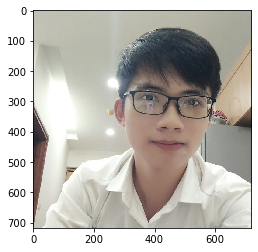

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

X = np.array(Image.open('./avatar.jpg'))
plt.imshow(X)

In [2]:
X.shape

(718, 720, 3)

Đang là ảnh màu, chúng ta chuyển sang ảnh đen trắng bằng cách nhân với vector sau:

In [3]:
X = X.dot([0.299, 0.5870, 0.111])

In [4]:
X.shape

(718, 720)

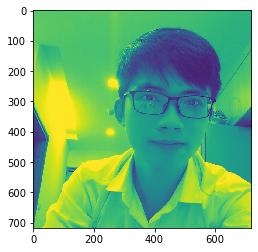

In [5]:
plt.imshow(X)

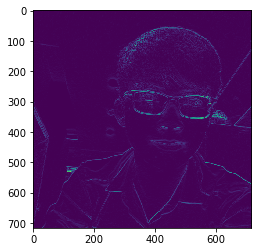

In [6]:
# tạo bộ lọc nang F1
F1 = np.array([[-1, -1, -1],
              [0, 0, 0],
              [1, 1, 1]])

# Tính tích chập 2 chiều
def conv2d(X, F, s = 1, p = 0):
    """
    X: ma trận đầu vào
    F: ma trận bộ lọc
    s: Bước sải
    p: padding
    """
    (w1, h1) = X.shape
    f = F.shape[0]
    w2 = int((w1 + 2 * p - f)/s) + 1
    h2 = int((h1 + 2 * p - f)/s) + 1
    Y = np.zeros((w2, h2))
    X_pad = np.pad(X, pad_width = p, mode = 'constant', constant_values = 0)
    for i in range(w2):
        for j in range(h2):
            idw = i*s
            idh = j*s
            Y[i,j] = np.abs(np.sum(X_pad[idw:(idw+f), idh:(idh+f)] * F))
    return Y

Y1 = conv2d(X, F1)
plt.imshow(Y1)

Ta tiếp tục thử nghiệm trên fillter lọc các đường dọc:

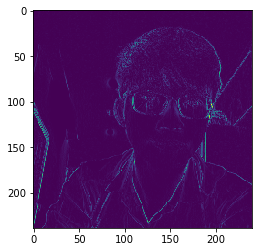

In [7]:
F2 = np.array([[1, 0, -1],
             [1, 0, -1],
             [1, 0, -1]])
Y2 = conv2d(X, F2, s = 3, p = 0)
plt.imshow(Y2)

Ta nhận thấy bọ lọc ngang lọc ra các đường ngang trong ảnh tốt, còn bộ lọc dọc lại lọc ra các đường dọc. Từ đó, ta thấy rằng bộ lọc có vai trò quan trọng trong trích xuất thông tin ảnh. Việc tìm ra bộ lọc tương ứng với các bài toán chính là việc tìm ra các tham số cho mô hình mạng CNN.

# 1.2 Pooling

Pooling layer thường được dùng giữa các convolutional layer, để giảm kích thước dữ liệu nhưng vẫn giữ được các thuộc tính quan trọng. Kích thước dữ liệu giảm giúp giảm việc tính toán trong model.

Có 2 loại pPooling thường được sử dụng trong CNN:
* `Max Pooling`: Thực hiện lấy giá trị lớn nhất trong kích thước Filter mà ta xét.
* `Average Pooling`: Thực hiện lấy giá trị trung bình tổng trong kích thước filter ta xét.

<img src="./images/pooling_2.jpg"/>

Trong một số model người ta dùng convolutional layer với stride > 1 để giảm kích thước dữ liệu thay cho pooling layer.

# 1.3 Flatten
Sau khi qua các lớp convolution và pooling thì model đã học tương đối được các đặc trưng của ảnh. Tiếp đó là đến lớp Flatten.

Flatten có tác dụng duỗi thẳng ma trận ảnh, để từ đó đưa vào mạng neurol để thực hiện phân lớp bài toán.

<img src="./images/flattern.png"/>

# 2. Áp dụng CNN cho bài toán MNIST với Keras

In [8]:
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [9]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# ảnh đen trắng nên cần thiết lập chiều cuối là 1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')

# Chuẩn hoá dữ liệu về khoảng 0 đến 1 để xử lý tốt hơn
x_train /= 255

# print(y_train.shape) # (60000,)

# chuyển y về dạng one-hot vector
y_train = np_utils.to_categorical(y_train, 10)

In [10]:
model = Sequential()

# 32 ma trận lọc với kích cỡ là (5,5), tức là lấy 32 feature ảnh
# --> giảm ảnh xuống (24,24,1)
# Ta thêm padding = 'Same' để đưa kích cỡ về (28,28,1) như ban đầu
# Sử dụng Relu là hàm activation
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [11]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer , loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.save('model.h5')

Epoch 1/5
60000/60000 [==============================] - 27s 443us/step - loss: 0.1611 - accuracy: 0.9506
Epoch 2/5
60000/60000 [==============================] - 24s 404us/step - loss: 0.0710 - accuracy: 0.9804
Epoch 3/5
60000/60000 [==============================] - 26s 428us/step - loss: 0.0609 - accuracy: 0.9832
Epoch 4/5
60000/60000 [==============================] - 24s 402us/step - loss: 0.0647 - accuracy: 0.9826
Epoch 5/5
60000/60000 [==============================] - 25s 410us/step - loss: 0.0664 - accuracy: 0.9822


# 3. Ứng dụng của CNN trong NLP

Thuật toán CNN đã cho thấy sự thành công trong các bài toán phân loại ảnh. Và nó cũng áp dụng vào các bài toán phân loại văn bản được. 

Ý nghĩa của một câu là khác nhau nếu như các từ sắp xếp các vị trí khác nhau. Ví dụ cùng 1 bộ các từ, ta có 2 câu:

`Con chó đuổi con mèo`

`Con mèo đuổi con chó`

Đây là 2 câu mang ý nghĩa khác nhau hoàn toàn do cách sắp xếp từ, nhưng tập các từ trong câu của 2 câu trên là giống nhau.

Trong ảnh, chúng ta áp dụng convolution 2D (2 chiều), còn trong NLP thì ý tưởng là áp dụng Conv1D.

<img src="./images/conv1d_word.png"/>

Chúng ta sẽ coi văn bản như một hình ảnh, chiều cao coi như là chiều embedding. Chúng ta cần cố định chiều cao bộ lọc bằng với chiều embedding để thực hiện phép tích chập.

<img src="./images/conv1d_embed_word.png"/>

Với pooling, ta có các loại sau:

<img src="./images/pooling.png"/>

Chúng ta sẽ áp dụng vào bài toán phân loại sắc thái bình luận tiếng Việt, dữ liệu được lấy từ cuộc thi AIVIVN.

Nhãn 0 đại diện cho bình luận tiêu cực, nhãn 1 đại diện cho bình luận tích cực.

Mở dữ liệu ra, ta thấy như hình sau:

<img src="./images/data.png"/>

In [12]:
def _create_row(sample):        
        d = {}
        d['id'] = sample[0].replace('\n','')
        review = ""

        for clause in sample[1:-1]:
            review+= clause.replace('\n','').strip()
        d['label'] = int(sample[-1].replace('\n',''))
            
        d['review'] = review
        return d
    
def _load_raw_data():
    a = []
    b = []
    with open('./data/train.crash', 'r', encoding='utf8') as f:
        for line in f:
            if 'train_' in line:
                b.append(a)
                a = [line]  
            elif line!='\n':
                a.append(line) 
        b.append(a)
    return b[1:]

raw_data = _load_raw_data()
lst = []
for row in raw_data:
    lst.append(_create_row(row))
lst[0]

{'id': 'train_000000',
 'label': 0,
 'review': '"Dung dc sp tot cam onshop Đóng gói sản phẩm rất đẹp và chắc chắn Chất lượng sản phẩm tuyệt vời"'}

In [13]:
lst[1]

{'id': 'train_000001',
 'label': 0,
 'review': '" Chất lượng sản phẩm tuyệt vời . Son mịn nhưng khi đánh lên không như màu trên ảnh"'}

Sử dụng FastText để Word Embedding, chúng ta sẽ biểu diễn mỗi từ là một vector có 50 phần tử.

In [14]:
import nltk
X_train = []
y_train = []
for l in lst:
    tokens_line = nltk.word_tokenize(l['review'][1:-2].lower())
    X_train.append(tokens_line)
    y_train.append([l['label']])

In [15]:
from gensim.models import FastText
num_features = 50 # số phần tử vector từ để biểu diễn từ
model = FastText(X_train, size = num_features)

In [16]:
model.wv.similar_by_word("tuyệt")

[('tuyệ', 0.9881494641304016),
 ('duyệt', 0.9705548882484436),
 ('tuyet', 0.9009732007980347),
 ('tuyệt', 0.8961675763130188),
 ('rệt', 0.8745667338371277),
 ('vệt', 0.8586007952690125),
 ('tuy', 0.8574777245521545),
 ('chắnchất', 0.7929993867874146),
 ('chắn.chất', 0.7924398183822632),
 ('tu', 0.7904223203659058)]

In [17]:
model.wv["tuyệt"]

array([-0.5647794 ,  0.49884158, -1.4571536 ,  0.46498933,  1.3495313 ,
       -0.11506946,  0.16465573, -2.8028014 ,  0.09633143,  0.46613464,
       -2.3496122 ,  0.43814263,  2.2077904 ,  1.94277   ,  1.310311  ,
        2.751208  ,  0.81647354, -0.5117263 , -0.8880755 , -0.34533226,
       -0.79994476, -1.3066518 ,  1.0049443 ,  0.85209906, -0.76393723,
        0.88424605, -0.23243408, -0.6432648 , -2.3956904 , -0.38364756,
       -0.6556202 , -0.9857336 ,  0.8061839 , -1.1110159 ,  1.2437819 ,
       -0.3702259 ,  1.2063435 ,  1.029202  , -1.352565  ,  0.08065768,
       -1.1672145 , -1.5227033 ,  0.02730922, -0.30788076,  1.378643  ,
        0.23951523,  1.713216  ,  0.2834897 ,  0.5897682 ,  0.15285206],
      dtype=float32)

In [18]:
len_max_sen = max([len(x) for x in X_train])
len_max_sen

679

Độ dài câu dài nhất trong X_train là 679. Chúng ta sẽ coi mỗi câu có độ dài như nhau là 679 (để đưa vào mô hình được thì phải thống nhất kích thước). Mỗi từ được biểu diễn qua model FastText đã train, với những câu không đủ độ dài 679, chúng ta thêm các từ `PAD` và coi đó là từ viền cho 1 câu.

In [19]:
X_train_num = []
for sent in X_train:
    temp = sent
    # thêm PAD
    if len(sent) < len_max_sen:
        add_element = len_max_sen - len(sent)
        for _ in range(add_element):
            temp.append('PAD')
    # vector hoá
    for i in range(len(sent)):
        sent[i] = model.wv[sent[i]]
    X_train_num.append(temp)

In [20]:
import numpy as np
# Lấy khoảng 10k câu để train
X_train_num = np.array(X_train_num[:10000])

In [21]:
X_train_num.shape

(10000, 679, 50)

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D

maxlen = 679
batch_size = 32
embedding_dims = 50
filters = 32
kernel_size = 3
hidden_dims = 250

CNN = Sequential()
CNN.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1, input_shape=(maxlen, embedding_dims)))
CNN.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
CNN.add(Flatten())
CNN.add(Dense(hidden_dims, activation='relu'))
CNN.add(Dropout(0.2))
CNN.add(Dense(1, activation='sigmoid'))
CNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 677, 32)           4832      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 675, 32)           3104      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 250)               5400250   
_________________________________________________________________
dropout_4 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 251       
Total params: 5,408,437
Trainable params: 5,408,437
Non-trainable params: 0
____________________________________________

In [23]:
y_train_num = np.array(y_train[:10000])

In [24]:
X_val = np.array(X_train[10000:])
y_val = np.array(y_train[10000:])

In [25]:
X_val.shape

(6087, 679, 50)

In [ ]:
epochs = 5
CNN.fit(X_train_num ,y_train_num, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Train on 10000 samples, validate on 6087 samples
Epoch 1/5
10000/10000 [==============================] - 10s 999us/step - loss: 0.3702 - accuracy: 0.8297 - val_loss: 0.3205 - val_accuracy: 0.8576
Epoch 2/5
 7808/10000 [======================>.......] - ETA: 1s - loss: 0.2914 - accuracy: 0.8730

Độ chính xác trên tập validation cũng hơn 86%. Cũng không tệ cho lắm :D